In [21]:
 # -*- coding: utf-8 -*-
"""
Created on Fri Sep 22 12:26:33 2017

@author: Manikanda Krishnan V (06-02-02-10-22-17-1-14787)
"""


import numpy as np
from skimage import io,color,transform
import matplotlib.pyplot as plt
import math

The image is loaded via skimage and is converted to grayscale whose values belong to [0,1]. The image is then resized to (256x256) for making the computations faster and the image is then displayed

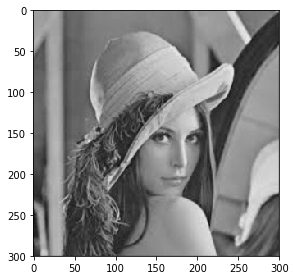

In [22]:
#loading and resizing image and displaying the original
image_path = r"C:\Users\Sephiroth\Downloads\iisc\courses\DIP\assignment 1\lena.jpg"
im = transform.resize(color.rgb2gray(io.imread(image_path)),(256,256))
io.imshow(im)
plt.show()

In Uniform Quantization, the dynamic range of the signal is divided into equal intervals and the quantization/reconstruction levels are the midpoints of those intervals.
For an i bit uniform quantizater , the dynamic range is split into 2^i parts and the reconstruction levels are the mid points of those equi-sized intervals.
The noise image is computed as the difference between the original image and quantized image.
The SQNR(dB) in practice is estimated as the 10log(Signal_Power/Noise_Power) or 10log(variance(signal)/10log(variance(noise)). In this code we shall use the latter definition.
Note: Information pertaining to the code is provided as comments in the appropriate sections

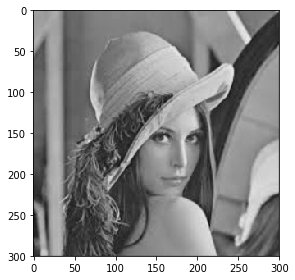

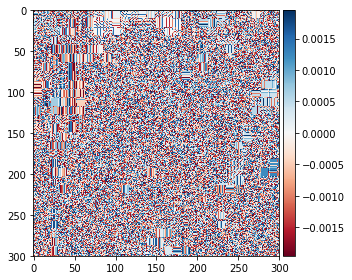

SQNR for 8 bit quantization : 102.259054069


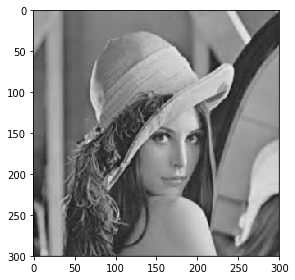

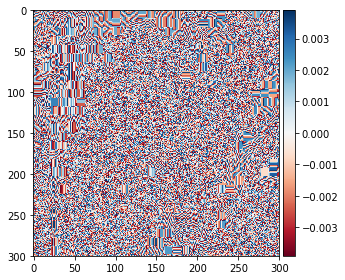

SQNR for 7 bit quantization : 88.101170611


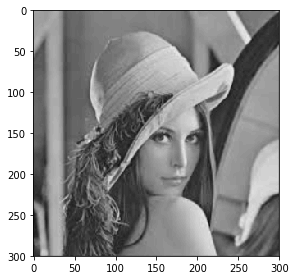

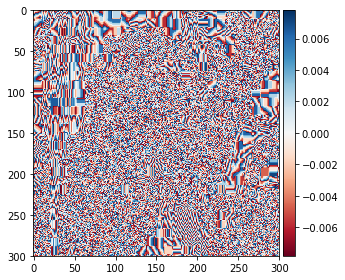

SQNR for 6 bit quantization : 74.1797587831


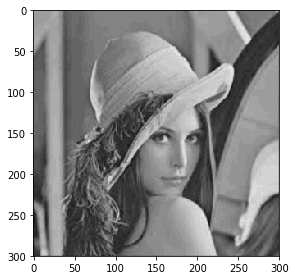

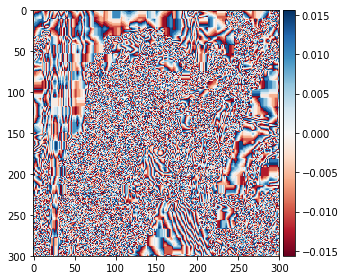

SQNR for 5 bit quantization : 60.3521658793


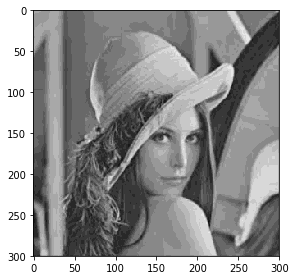

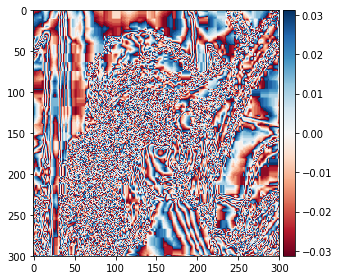

SQNR for 4 bit quantization : 45.9395010089


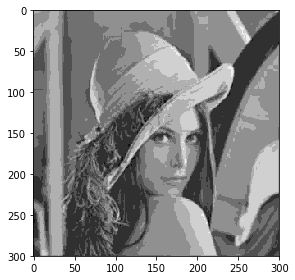

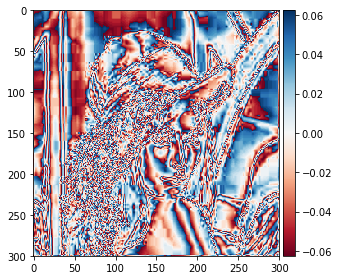

SQNR for 3 bit quantization : 32.6568244801


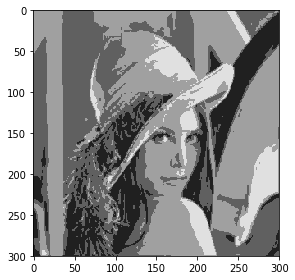

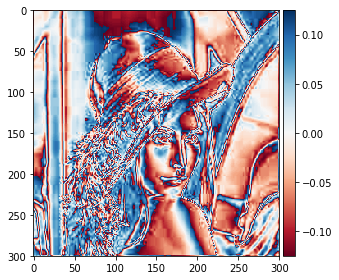

SQNR for 2 bit quantization : 18.6587915987


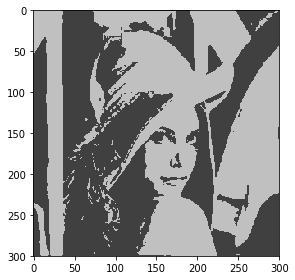

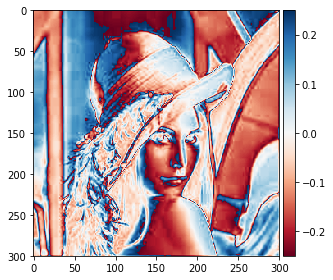

SQNR for 1 bit quantization : 5.12382288712


In [23]:
"""
iterating over the number of bits, in each iteration the levels and intervals(gaps) are calculated.
The image is scanned to assign the appropriate level for each pixel. SNR is then calculated and the quantized image is displayed
"""
for i in range(8,0,-1) :
    step = 1.0/(2**i)
    #initial value is the mid point of the interval [0,2^-i] which is 2^(-i-1)
    init_val = step/2;
    #in uniform quantizer(with bounded range) the reconstruction levels end up equally spaced.
    levels = [step*x + init_val for x in range(0,(2**i))]
    #decision levels 
    decision_levels = [step*x for x in range(1,2**i)]
    def f(x) :
        """
        Takes pixel value as input and assigns the appropriate reconstruction level to them.
        """
        for y,z in enumerate(decision_levels) :
            if x > z : pass
            else : return levels[y]
        return levels[-1]
    f = np.vectorize(f)

    #the image is quantized and the noise and quantized images are then displayed
    im1 = f(im)
    io.imshow(im1)
    plt.show()
    noise = im - im1
    io.imshow(noise)
    plt.show()
    #SQNR is computed as the 10log(variance(signal)/10log(variance(noise))
    print "SQNR for {} bit quantization : {}".format(i,10*math.log(np.var(im[:])/np.var(im[:] - im1[:])))

We can notice the increasing no of monotone patches as we reduce the number of bits which we shall try to address in the next question of dithering.